In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
df = pd.read_csv('/kaggle/input/suicide-watch/Suicide_Detection.csv', encoding="ISO-8859-1")
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"Iâm so lostHello, my name is Adam (16) and I...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty teaðð¦â¼ï...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [2]:
suicide = df[df['class']=='suicide']
non_suicide = df[df['class']== 'non-suicide']
suicide = suicide.head(30000)
non_suicide = non_suicide.head(30000)
df = pd.concat([suicide,non_suicide])
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"Iâm so lostHello, my name is Adam (16) and I...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
...,...,...,...
59820,89731,She was only seventeen oh why are girls in son...,non-suicide
59821,89732,i wanna talk to something until i go to sleep ...,non-suicide
59822,89733,I know this is like super random but Fuck labe...,non-suicide
59825,89737,"Ok, I think I have officially decided That I a...",non-suicide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 0 to 59826
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60000 non-null  int64 
 1   text        60000 non-null  object
 2   class       60000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [4]:
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [5]:
!pip install tqdm
!pip install text_hammer
import text_hammer as th
!pip install --force-reinstall --no-deps beautifulsoup4==4.12.2


from tqdm import tqdm
import pandas as pd
import text_hammer as th

tqdm.pandas()

def text_preprocessing(df, col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x: str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return df

df = text_preprocessing(df, 'text')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.2
    Uninstalling beautifulsoup4-4.12.2:
      Successfully uninstalled beautifulsoup4-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.9.2 requires beautifulsoup4>=4.10, but you have beautifulsoup4 4.9.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 5.1 MB/s eta 0:00:00
  Atte

100%|██████████| 60000/60000 [00:00<00:00, 148440.99it/s]


In [6]:
df.head(20)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,iam so losthello my name is adam 16 and iave b...,suicide
5,11,honetly idki dont know what im even doing here...,suicide
6,12,trigger warning excuse for self inflicted burn...,suicide
7,13,it ends tonighti canat do it anymore i quit,suicide
9,18,my life is over at 20 years oldhello all i am ...,suicide
10,19,i took the rest of my sleeping pills and my pa...,suicide
11,20,can you imagine getting old me neitherwrinkles...,suicide
12,21,do you think getting hit by a train would be p...,suicide


In [7]:
df_preprocess = df.copy()
posts = df_preprocess.text.copy()

In [8]:
def removeWordWithChar(text, char_list):
    #Remove words in a text that contains a char from the list.
    text = text.split()
    res = [ele for ele in text if all(ch not in ele for ch in char_list)]
    res = ' '.join(res)
    return res

char_list = ['@', '#', 'http', 'www', '/', '[]']

removeWordWithChar(posts[1], char_list)

posts_cleaned = []

for p in posts:
    posts_cleaned.append(removeWordWithChar(p, char_list))

In [9]:
posts_cleaned[0]

'ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her as of a few days ago she began threatening suicide i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe ill come back i know a lot of people will threaten this in order to get their way but what happens if she really does what do i do and how am i supposed to handle her death on my hands i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure im worried today may be the day she does it and i hope so much it doesnt happen'

In [10]:
len(posts_cleaned)

60000

In [11]:

def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1):
            if len(text_tokens[i]) < 4:
                del (text_tokens[i])

        texts_tokens.append(text_tokens)

    return texts_tokens

In [12]:
posts_tokens = tokenize(posts_cleaned)
posts_tokens[:1]

[['wife',
  'threatening',
  'suiciderecently',
  'left',
  'wife',
  'good',
  'because',
  'cheated',
  'twice',
  'lied',
  'much',
  'that',
  'have',
  'decided',
  'refuse',
  'back',
  'days',
  'began',
  'threatening',
  'suicide',
  'have',
  'tirelessly',
  'spent',
  'these',
  'paat',
  'days',
  'talking',
  'keeps',
  'hesitating',
  'because',
  'wants',
  'believe',
  'come',
  'back',
  'know',
  'people',
  'will',
  'threaten',
  'this',
  'order',
  'their',
  'what',
  'happens',
  'really',
  'does',
  'what',
  'supposed',
  'handle',
  'death',
  'hands',
  'still',
  'love',
  'wife',
  'cannot',
  'deal',
  'with',
  'getting',
  'cheated',
  'again',
  'constantly',
  'feeling',
  'insecure',
  'worried',
  'today',
  'does',
  'hope',
  'much',
  'doesnt',
  'happen']]

In [13]:

nltk.download('stopwords')
nltk.download('punkt')

def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)

    return texts_filtered

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:

posts_filtered = removeSW(posts_tokens)
posts_filtered[:1]

[['wife',
  'threatening',
  'suiciderecently',
  'left',
  'wife',
  'good',
  'cheated',
  'twice',
  'lied',
  'much',
  'decided',
  'refuse',
  'back',
  'days',
  'began',
  'threatening',
  'suicide',
  'tirelessly',
  'spent',
  'paat',
  'days',
  'talking',
  'keeps',
  'hesitating',
  'wants',
  'believe',
  'come',
  'back',
  'know',
  'people',
  'threaten',
  'order',
  'happens',
  'really',
  'supposed',
  'handle',
  'death',
  'hands',
  'still',
  'love',
  'wife',
  'cannot',
  'deal',
  'getting',
  'cheated',
  'constantly',
  'feeling',
  'insecure',
  'worried',
  'today',
  'hope',
  'much',
  'doesnt',
  'happen']]

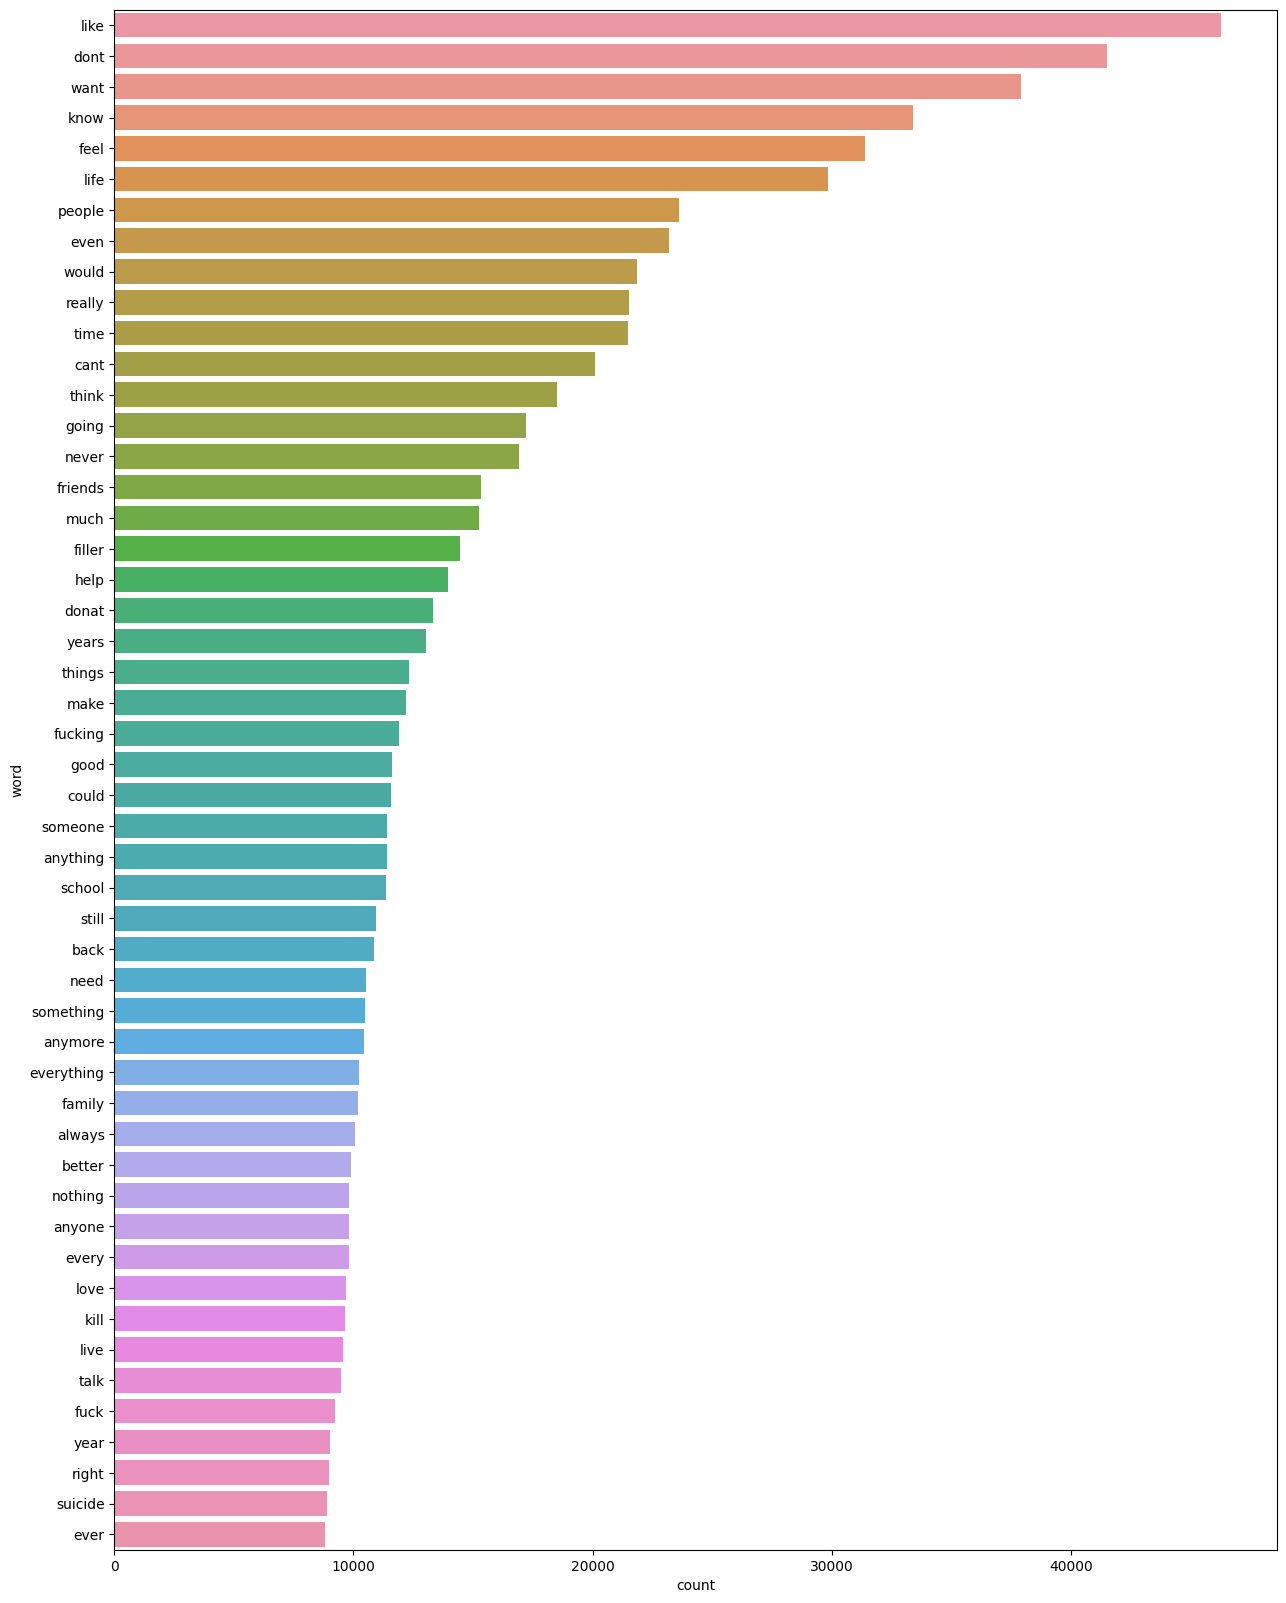

In [15]:
from collections import Counter
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Count word frequencies
word_counts = Counter(word for post in posts_filtered for word in post)

# Convert to DataFrame
word_freq = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Sort by count in descending order
word_freq = word_freq.sort_values(by='count', ascending=False)

# Plot the top 50 words
plt.figure(figsize=(15, 20))
sns.barplot(x='count', y='word', data=word_freq.iloc[:50])
plt.show()

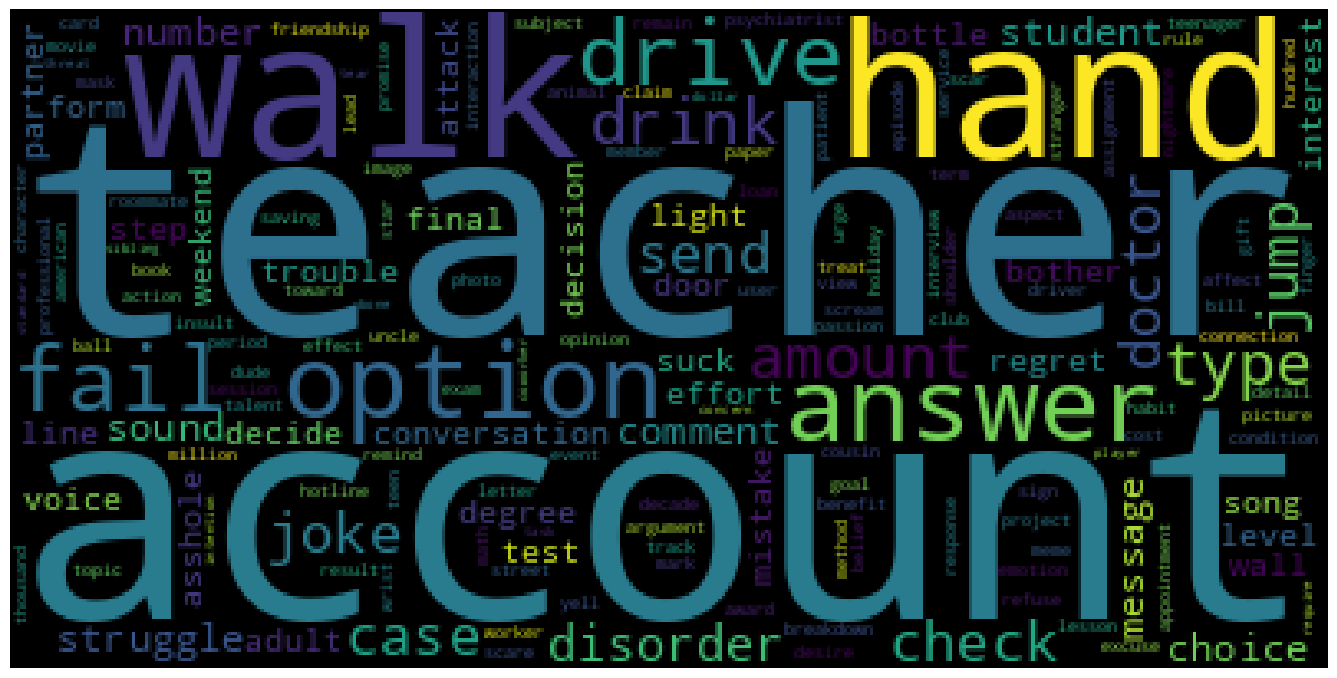

In [16]:
from wordcloud import WordCloud  # Import WordCloud

# Assuming you have defined feature_names
feature_names = word_freq['word'].values

# Create WordCloud object
wc = WordCloud(max_words=300)

# Generate WordCloud
wc.generate(' '.join(word for word in feature_names[500:3500]))

# Plot the WordCloud
plt.figure(figsize=(17, 12))
plt.axis('off')
plt.imshow(wc)
plt.show()


In [17]:
df.head()

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,iam so losthello my name is adam 16 and iave b...,suicide
5,11,honetly idki dont know what im even doing here...,suicide
6,12,trigger warning excuse for self inflicted burn...,suicide


In [18]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        texts_lem.append(text_lem)

    return texts_lem


In [19]:
import nltk
import subprocess

try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

from nltk.corpus import wordnet

posts_lem = lemma(posts_filtered)

posts_lem[0]

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

['wife',
 'threaten',
 'suiciderecently',
 'leave',
 'wife',
 'good',
 'cheat',
 'twice',
 'lie',
 'much',
 'decide',
 'refuse',
 'back',
 'days',
 'begin',
 'threaten',
 'suicide',
 'tirelessly',
 'spend',
 'paat',
 'days',
 'talk',
 'keep',
 'hesitate',
 'want',
 'believe',
 'come',
 'back',
 'know',
 'people',
 'threaten',
 'order',
 'happen',
 'really',
 'suppose',
 'handle',
 'death',
 'hand',
 'still',
 'love',
 'wife',
 'cannot',
 'deal',
 'get',
 'cheat',
 'constantly',
 'feel',
 'insecure',
 'worry',
 'today',
 'hope',
 'much',
 'doesnt',
 'happen']

In [20]:
posts_ready = []
for posts in posts_lem:
    string = ' '
    string = string.join(posts)
    posts_ready.append(string)

In [21]:
len(posts_ready)

60000

In [22]:
df_preprocess['original_text'] = df['text']
df_preprocess['preprocessed_text'] = posts_ready
df_preprocess[['original_text', 'preprocessed_text', 'class']].head()

,original_text,preprocessed_text,class
0,ex wife threatening suiciderecently i left my ...,wife threaten suiciderecently leave wife good ...,suicide
3,i need helpjust help me im crying so hard,need helpjust help cry hard,suicide
4,iam so losthello my name is adam 16 and iave b...,losthello name adam iave struggle years afraid...,suicide
5,honetly idki dont know what im even doing here...,honetly idki dont know even feel like nothing ...,suicide
6,trigger warning excuse for self inflicted burn...,trigger warn excuse self inflict burnsi know c...,suicide


In [23]:
data = [{'text': text, 'class': label} for text, label in zip(posts_ready, df['class'])]

# Convert the list of dictionaries to a DataFrame
df_ready = pd.DataFrame(data)

X = df_ready['text']
y = df_ready['class']

df_ready

,text,class
0,wife threaten suiciderecently leave wife good ...,suicide
1,need helpjust help cry hard,suicide
2,losthello name adam iave struggle years afraid...,suicide
3,honetly idki dont know even feel like nothing ...,suicide
4,trigger warn excuse self inflict burnsi know c...,suicide
...,...,...
59995,seventeen girls songs always seventeen movie s...,non-suicide
59996,wanna talk something sleep check recent post h...,non-suicide
59997,know like super random fuck label wantas long ...,non-suicide
59998,think officially decide satanistthe satanic te...,non-suicide


In [24]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words= 30000,lower=True)
tokenizer.fit_on_texts(X)


2024-04-18 19:25:00.606537: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 19:25:00.606631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 19:25:00.744374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(X) # this converts texts into some numeric sequences 
X = pad_sequences(X,maxlen=150,padding='post') # this makes the length of all numeric sequences equal 
X[1]

array([   30, 12973,    20,   217,    96,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [26]:
X.shape

(60000, 150)

In [27]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


In [28]:
from gensim.models import KeyedVectors

vector_size = 100
num_words = 30000
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [29]:
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional,SimpleRNN 

# from tensorflow.compat.v1.keras.layers import CuDNNRNN
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [30]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
y=pd.get_dummies(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

Bi-LSTM-RNN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          3000000   
                                                                 
 dropout (Dropout)           (None, 150, 100)          0         
                                                                 
 bidirectional (Bidirection  (None, 150, 700)          1262800   
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 150, 700)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 150, 900)          4143600   
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         

I0000 00:00:1713468507.130218      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 [==============================] - ETA: 0s - loss: 0.5687 - accuracy: 0.7175
Epoch 1: val_accuracy improved from -inf to 0.84058, saving model to ./best_model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 199s 498ms/step - loss: 0.5687 - accuracy: 0.7175 - val_loss: 0.4006 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - ETA: 0s - loss: 0.3795 - accuracy: 0.8470
Epoch 2: val_accuracy improved from 0.84058 to 0.86292, saving model to ./best_model.h5
375/375 [==============================] - 184s 492ms/step - loss: 0.3795 - accuracy: 0.8470 - val_loss: 0.3460 - val_accuracy: 0.8629 - lr: 0.0010
Epoch 3/50
375/375 [==============================] - ETA: 0s - loss: 0.3161 - accuracy: 0.8731
Epoch 3: val_accuracy improved from 0.86292 to 0.87408, saving model to ./best_model.h5
375/375 [==============================] - 185s 492ms/step - loss: 0.3161 - accuracy: 0.8731 - val_loss: 0.2860 - val_accuracy: 0.8741 - lr: 0.0010
Epoch 4/50
375/375 [==============================] - ETA: 0s - loss: 0.2740 - accuracy: 0.8921
Epoch 4: val_accuracy improved from 0.87408 to 0.89617, saving model to ./best_model.h5
375/

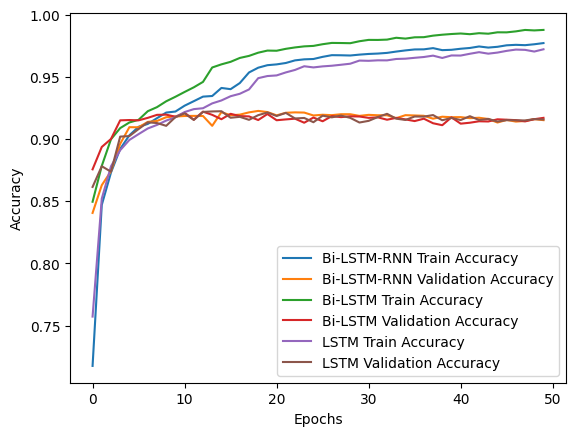

         Model      Loss  Accuracy
0  Bi-LSTM-RNN  0.314872  0.915250
1      Bi-LSTM  0.447672  0.917083
2         LSTM  0.298134  0.915750


In [31]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)

EMBEDDING_DIM = 100

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define model architectures
def create_bilstm_rnn_model(input_shape, num_classes):
    model = Sequential([
        Embedding(input_dim=num_words, 
                    output_dim=EMBEDDING_DIM, 
                    input_length=X.shape[1], weights=[gensim_weight_matrix], 
                    trainable=False),
        Dropout(0.275),
        Bidirectional(LSTM(units=350, return_sequences=True)),
        Dropout(0.25),
        Bidirectional(LSTM(units=450, return_sequences=True)),
        Dropout(0.225),
        Bidirectional(LSTM(units=500, return_sequences=True)),
        Dropout(0.45),
        SimpleRNN(125, return_sequences=True),
        Dropout(0.425),
        SimpleRNN(150, return_sequences=False),
        Dense(2, activation='softmax')
    ])
    return model

def create_bilstm_model(input_shape, num_classes):
    model = Sequential([
        Embedding(input_dim=num_words, 
                    output_dim=EMBEDDING_DIM, 
                    input_length=X.shape[1], weights=[gensim_weight_matrix], 
                    trainable=False),
        Dropout(0.275),
        Bidirectional(LSTM(units=350, return_sequences=True)),
        Dropout(0.25),
        Bidirectional(LSTM(units=450, return_sequences=True)),
        Dropout(0.225),
        Bidirectional(LSTM(units=500, return_sequences=False)),
        Dropout(0.45),
        Flatten(),
        Dense(2, activation='softmax')
    ])
    return model

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        Embedding(input_dim=num_words, 
                    output_dim=EMBEDDING_DIM, 
                    input_length=X.shape[1], weights=[gensim_weight_matrix], 
                    trainable=False),
        Dropout(0.275),
        LSTM(units=350, return_sequences=True),
        Dropout(0.25),
        LSTM(units=450, return_sequences=True),
        Dropout(0.225),
        LSTM(units=500, return_sequences=False),
        Dropout(0.45),
        Flatten(),
        Dense(2, activation='softmax')
    ])
    return model

# Compile models
num_classes = 2
bilstm_rnn_model = create_bilstm_rnn_model(X.shape[1], num_classes)
bilstm_model = create_bilstm_model(X.shape[1], num_classes)
lstm_model = create_lstm_model(X.shape[1], num_classes)

# Print model summaries
print("Bi-LSTM-RNN Model Summary:")
bilstm_rnn_model.summary()

print("\nBi-LSTM Model Summary:")
bilstm_model.summary()

print("\nLSTM Model Summary:")
lstm_model.summary()

histories = {}

for model in [bilstm_rnn_model, bilstm_model, lstm_model]:
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
mc = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train and evaluate models
models = {'Bi-LSTM-RNN': bilstm_rnn_model, 'Bi-LSTM': bilstm_model, 'LSTM': lstm_model}
evaluations = {}

for name, model in models.items():
    print(f"Training {name} Model...")
    history = model.fit(X_train, y_train, 
                                epochs = 50, batch_size = 128, 
                                validation_data=(X_test, y_test),
                                verbose = 1, callbacks= [mc, reduce_lr])
    histories[name] = history.history
    evaluations[name] = model.evaluate(X_test, y_test)

accuracy = {}
# Print evaluation results
for name, evaluation in evaluations.items():
    print(f"{name} Model Evaluation Loss:", evaluation[0])
    print(f"{name} Model Evaluation Accuracy:", evaluation[1])
    accuracy[name] = evaluation[1]


# Plot training curves
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'{name} Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Comparison Table
results = {
    'Model': list(evaluations.keys()),
    'Loss': [evaluation[0] for evaluation in evaluations.values()],
    'Accuracy': [evaluation[1] for evaluation in evaluations.values()]
}

results_df = pd.DataFrame(results)
print(results_df)


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true and y_pred are your true labels and predicted labels respectively

# For Bi-LSTM-RNN model
y_pred_bilstm_rnn = models['Bi-LSTM-RNN'].predict(X_test)
y_pred_bilstm_rnn = np.argmax(y_pred_bilstm_rnn, axis=1)
precision_bilstm_rnn = precision_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_bilstm_rnn)
recall_bilstm_rnn = recall_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_bilstm_rnn)
f1_bilstm_rnn = f1_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_bilstm_rnn)

# For Bi-LSTM model
y_pred_bilstm = models['Bi-LSTM'].predict(X_test)
y_pred_bilstm = np.argmax(y_pred_bilstm, axis=1)
precision_bilstm = precision_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_bilstm)
recall_bilstm = recall_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_bilstm)
f1_bilstm = f1_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_bilstm)

# For LSTM model
y_pred_lstm = models['LSTM'].predict(X_test)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
precision_lstm = precision_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_lstm)
recall_lstm = recall_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_lstm)
f1_lstm = f1_score(np.argmax(y_test.to_numpy(), axis=1), y_pred_lstm)

print("Bi-LSTM-RNN Precision:", precision_bilstm_rnn)
print("Bi-LSTM-RNN Recall:", recall_bilstm_rnn)
print("Bi-LSTM-RNN F1 Score:", f1_bilstm_rnn)

print("Bi-LSTM Precision:", precision_bilstm)
print("Bi-LSTM Recall:", recall_bilstm)
print("Bi-LSTM F1 Score:", f1_bilstm)

print("LSTM Precision:", precision_lstm)
print("LSTM Recall:", recall_lstm)
print("LSTM F1 Score:", f1_lstm)

results = {
    'Model': ['Bi-LSTM-RNN', 'Bi-LSTM', 'LSTM'],
    'Precision': [precision_bilstm_rnn, precision_bilstm, precision_lstm],
    'Recall': [recall_bilstm_rnn, recall_bilstm, recall_lstm],
    'F1 Score': [f1_bilstm_rnn, f1_bilstm, f1_lstm]
}

pd.set_option('display.max_rows', 300)  # Adjust the number of maximum rows displayed
pd.set_option('display.max_columns', 300)

results_df = pd.DataFrame(results)

# Style the DataFrame for better visualization
styled_results_df = results_df.style.background_gradient(cmap='viridis', subset=['Precision', 'Recall', 'F1 Score'])

# Increase font size
styled_results_df = styled_results_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '16px')]
}, {
    'selector': 'td',
    'props': [('font-size', '16px')]
}])

# Increase cell width
styled_results_df = styled_results_df.set_properties(**{'width': '300px', 'text-align': 'center'})

# Display the styled DataFrame
styled_results_df

375/375 [==============================] - 8s 21ms/step
Bi-LSTM-RNN Precision: 0.9131800893004796
Bi-LSTM-RNN Recall: 0.9181908879281676
Bi-LSTM-RNN F1 Score: 0.91567863361247
Bi-LSTM Precision: 0.9078498293515358
Bi-LSTM Recall: 0.9288327236448287
Bi-LSTM F1 Score: 0.9182214185912715
LSTM Precision: 0.9032726100274061
LSTM Recall: 0.9316594612570669
LSTM F1 Score: 0.9172464598510273


,Model,Precision,Recall,F1 Score
0,Bi-LSTM-RNN,0.913180,0.918191,0.915679
1,Bi-LSTM,0.907850,0.928833,0.918221
2,LSTM,0.903273,0.931659,0.917246


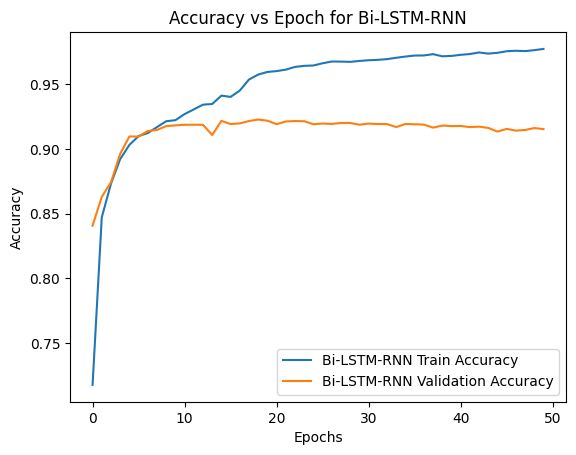

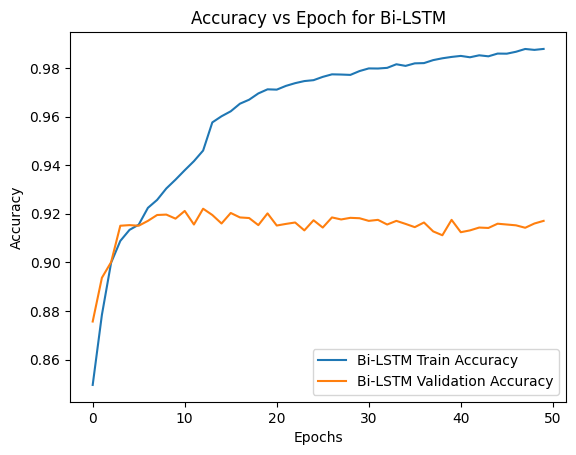

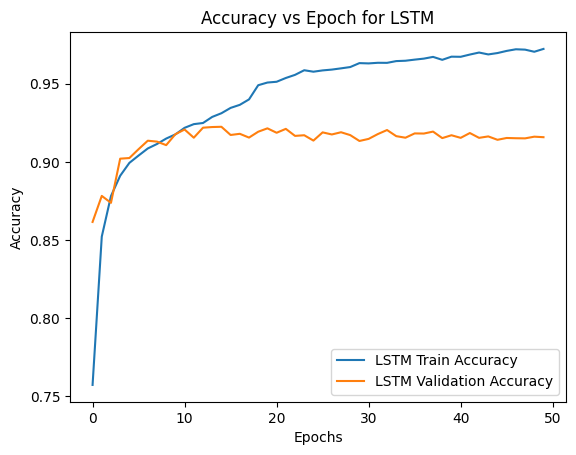

375/375 [==============================] - 24s 63ms/step


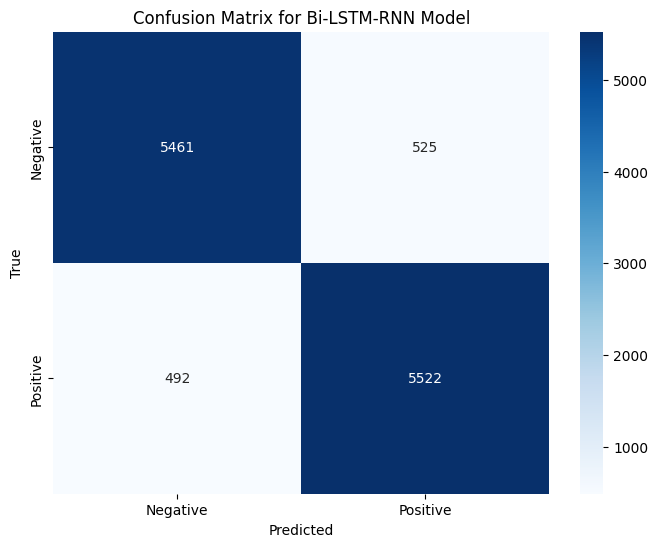

375/375 [==============================] - 18s 48ms/step


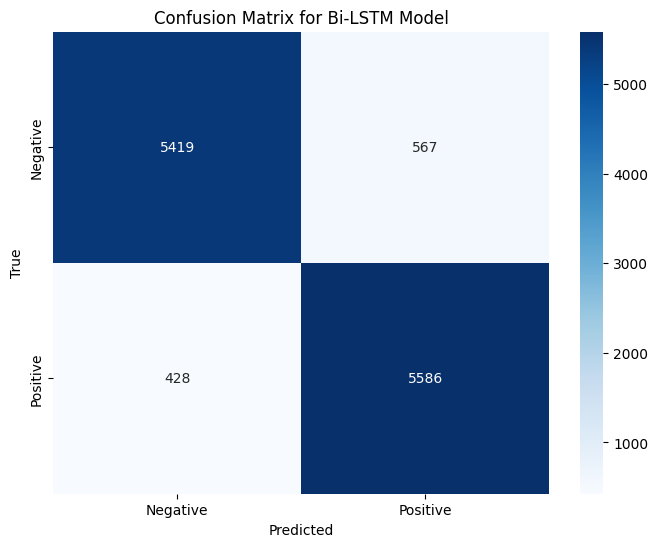

375/375 [==============================] - 8s 21ms/step


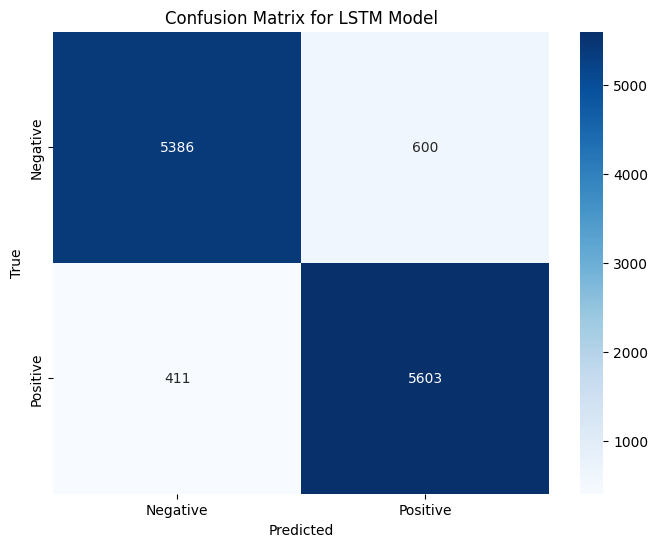

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot accuracy vs epoch plot for each model separately
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'{name} Validation Accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Epoch for {name}')
    plt.legend()
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(np.argmax(y_test.to_numpy(), axis=1), y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name} Model')
    plt.show()
